# Example Fusion IDLab

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

def show_image(image_path, figsize=(8,8)):
    img_pil = Image.open(image_path)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(np.array(img_pil).astype(np.uint8))
    ax.grid(False)
    plt.show()

def create_output_image_path(input_image_path, output_folder, method, output_type="heatmap"):
    # Extract the filename from the input image path
    input_image_name = os.path.basename(input_image_path)

    # Construct the output image path
    output_image_name = f"{input_image_name}_{method}_{output_type}.png"
    output_image_path = os.path.join(output_folder, output_image_name)

    return output_image_path

## Run individual methods

In [2]:
output_folder = "./out2"

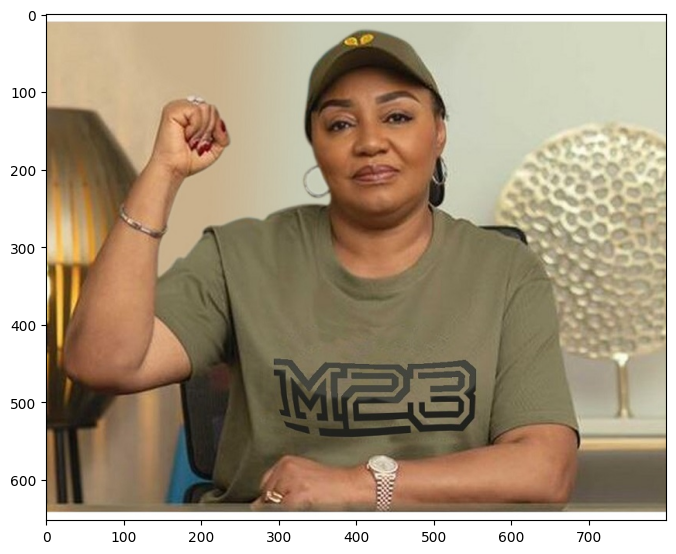

In [3]:
input_image_path = "./examples_input/denise_m23.jpg"
show_image(input_image_path)

In [4]:
import forgery_detection

In [5]:
# ADQ1
output_image_path_adq1 = create_output_image_path(input_image_path, output_folder, "ADQ1")

In [6]:
forgery_detection.adq1(input_image_path, output_image_path_adq1)

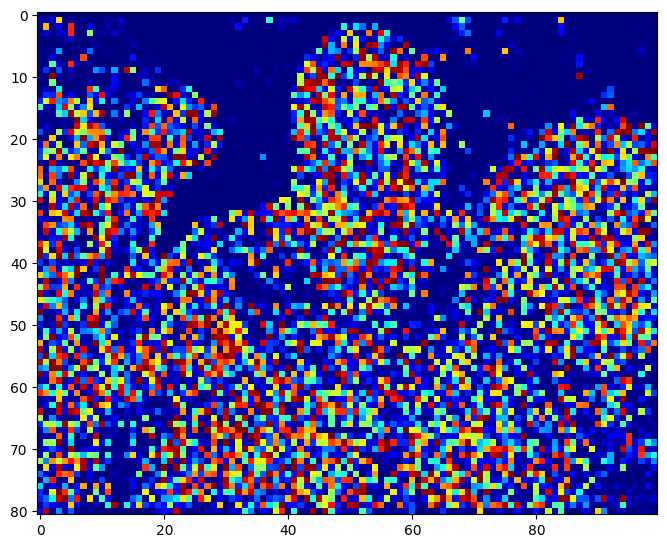

In [7]:
show_image(output_image_path_adq1)

In [8]:
# BLK
output_image_path_blk = create_output_image_path(input_image_path, output_folder, "BLK")

In [9]:
forgery_detection.blk(input_image_path, output_image_path_blk)

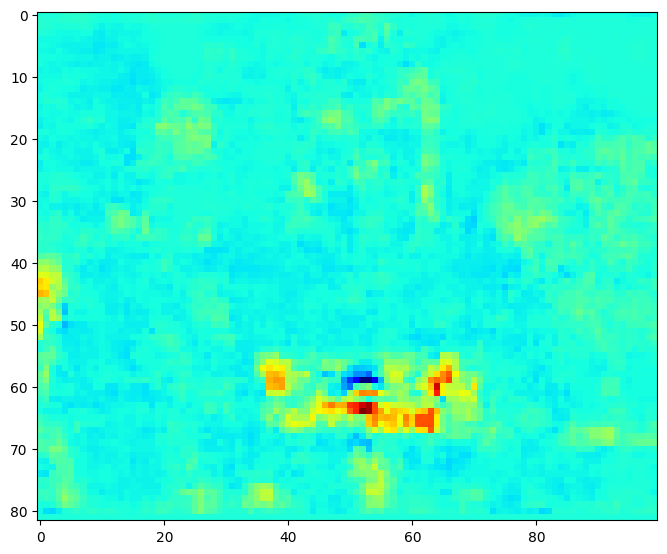

In [10]:
show_image(output_image_path_blk)

In [11]:
# DCT
output_image_path_dct = create_output_image_path(input_image_path, output_folder, "DCT")

In [12]:
forgery_detection.dct(input_image_path, output_image_path_dct)

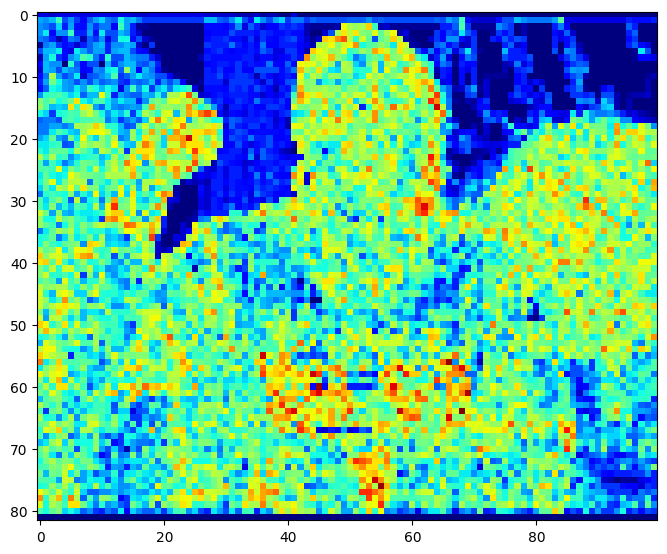

In [13]:
show_image(output_image_path_dct)

In [14]:
# CAGI
output_image_path_cagi = create_output_image_path(input_image_path, output_folder, "CAGI")

In [15]:
forgery_detection.cagi(input_image_path, output_image_path_cagi)

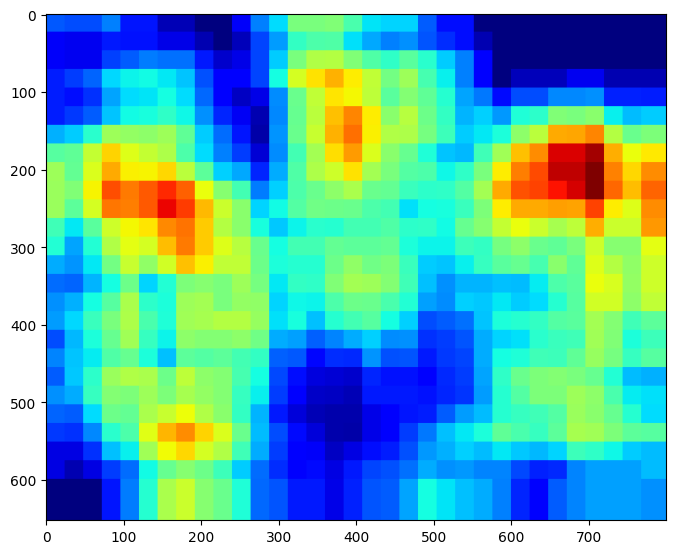

In [16]:
show_image(output_image_path_cagi)

In [17]:
# Requires Tensorflow & Comprint repository
import forgery_detection_comprint_noiseprint

2024-06-10 18:28:04.874356: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-10 18:28:04.896228: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-10 18:28:04.896252: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-10 18:28:04.896897: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-10 18:28:04.901651: I tensorflow/core/platform/cpu_feature_guar

In [18]:
output_file_heatmap_path_noiseprint = create_output_image_path(input_image_path, output_folder, "Noiseprint", output_type="heatmap")
output_file_fingerprint_path_noiseprint = create_output_image_path(input_image_path, output_folder, "Noiseprint", output_type="fingerprint")

In [19]:
noiseprint_model_path = "./comprint/models/noiseprint_nets/net"
forgery_detection_comprint_noiseprint.noiseprint(input_image_path, output_file_fingerprint_path_noiseprint, output_file_heatmap_path_noiseprint, noiseprint_model_path)

INFO:tensorflow:Restoring parameters from ./comprint/models/noiseprint_nets/net_jpg101/model


2024-06-10 18:28:06.547135: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-10 18:28:06.547237: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-10 18:28:06.547258: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-10 18:28:06.547419: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-10 18:28:06.547430: I tensorflow/core/common_runtime/gpu/gpu

 653x800 small 101


2024-06-10 18:28:11.572639: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


Fingerprint extracted in 7.46 sec.
Heatmap extracted in 2.66 sec.


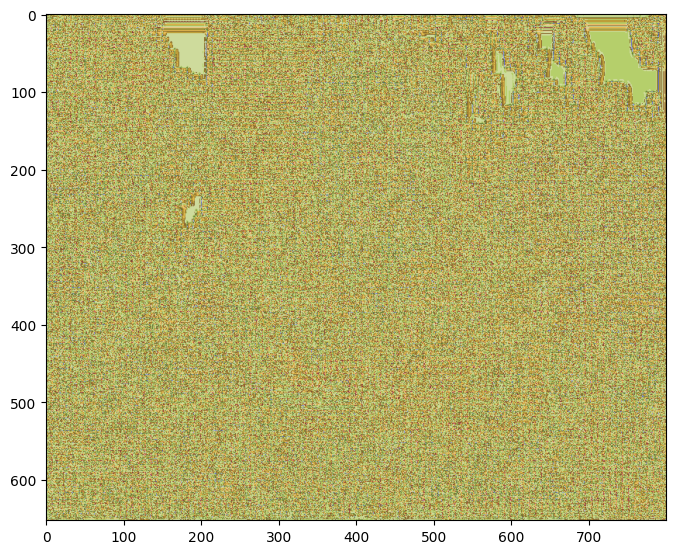

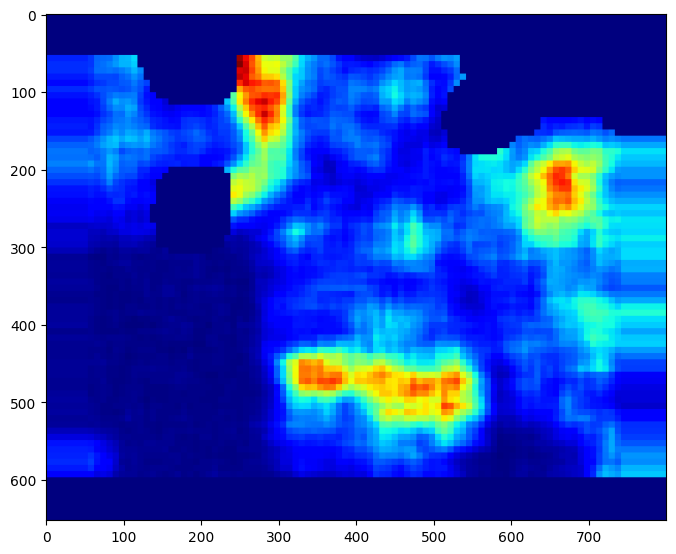

In [20]:
show_image(output_file_fingerprint_path_noiseprint)
show_image(output_file_heatmap_path_noiseprint)

In [21]:
output_file_heatmap_path_comprint = create_output_image_path(input_image_path, output_folder, "Comprint", output_type="heatmap")
output_file_fingerprint_path_comprint = create_output_image_path(input_image_path, output_folder, "Comprint", output_type="fingerprint")

In [22]:
comprint_model_path = "./comprint/models/Comprint_Siamese_Full_jpg_ps_full/"
gpu=False
forgery_detection_comprint_noiseprint.comprint(input_image_path, output_file_fingerprint_path_comprint, output_file_heatmap_path_comprint, comprint_model_path, use_gpu=gpu)

2024-06-10 18:28:18.993100: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-10 18:28:18.993220: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-10 18:28:18.993240: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-10 18:28:18.993750: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-10 18:28:18.993780: I tensorflow/core/common_runtime/gpu/gpu

Fingerprint extracted in 2.10 sec.
./out2/denise_m23.jpg_Comprint_fingerprint.png
Heatmap extracted in 2.76 sec.
./out2/denise_m23.jpg_Comprint_heatmap.png


./out2/denise_m23.jpg_Comprint_fingerprint.png


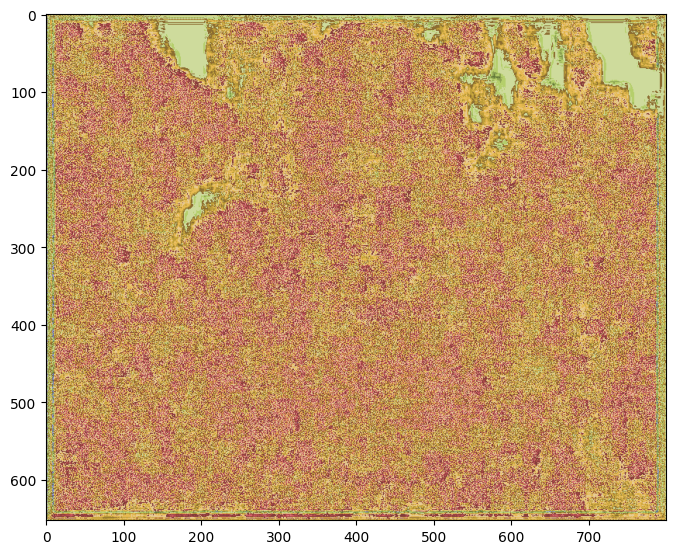

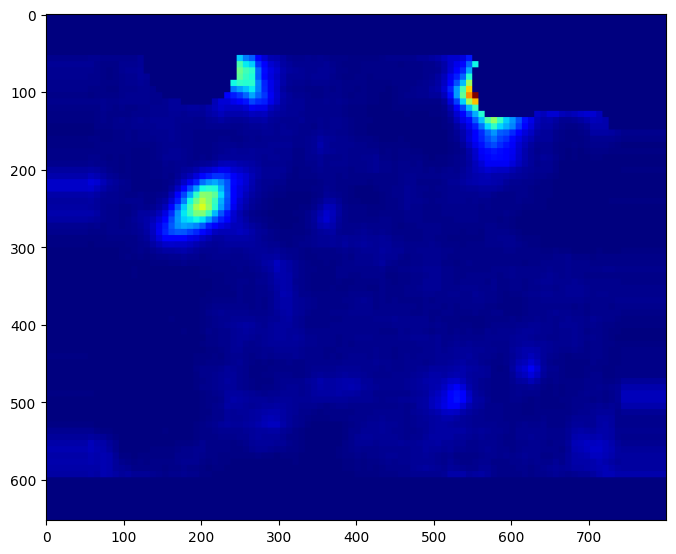

In [23]:
print(output_file_fingerprint_path_comprint)
show_image(output_file_fingerprint_path_comprint)
show_image(output_file_heatmap_path_comprint)

In [24]:
output_file_heatmap_path_comprint_plus_noisprint = create_output_image_path(input_image_path, output_folder, "Comprint+Noiseprint", output_type="heatmap")

In [25]:
# By first running Noiseprint and Comprint above, the fingerprint (comprint & noiseprint) files have been created as npz
forgery_detection_comprint_noiseprint.comprint_plus_noiseprint(input_image_path, output_file_fingerprint_path_comprint, output_file_fingerprint_path_noiseprint, output_file_heatmap_path_comprint_plus_noisprint)

Heatmap extracted in 4.31 sec.


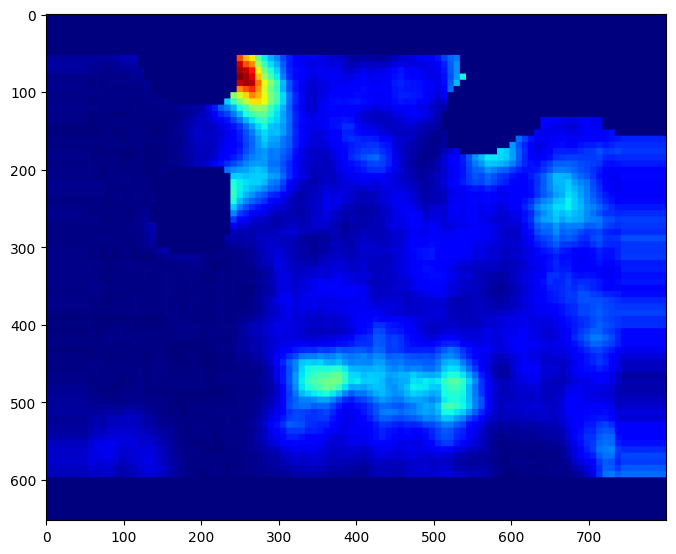

In [26]:
show_image(output_file_heatmap_path_comprint_plus_noisprint)

In [27]:
# Requires torch & CAT-Net repository
# Also run ./download_weights from the ./CAT-Net repository
import forgery_detection_catnet

/home/sangi/anaconda3/envs/fusion2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
output_file_heatmap_path_catnet = create_output_image_path(input_image_path, output_folder, "CATNet")
catnet_modelpath = "./CAT-Net/output/splicing_dataset/CAT_full/CAT_full_v2.pth.tar"

In [29]:
forgery_detection_catnet.catnet(input_image_path, output_file_heatmap_path_catnet, catnet_modelpath,use_gpu=False)

=> loading model from ./CAT-Net/output/splicing_dataset/CAT_full/CAT_full_v2.pth.tar


/home/sangi/anaconda3/envs/fusion2/lib/python3.9/site-packages/torch/nn/functional.py:3060: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
/home/sangi/anaconda3/envs/fusion2/lib/python3.9/site-packages/torch/nn/functional.py:2952: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


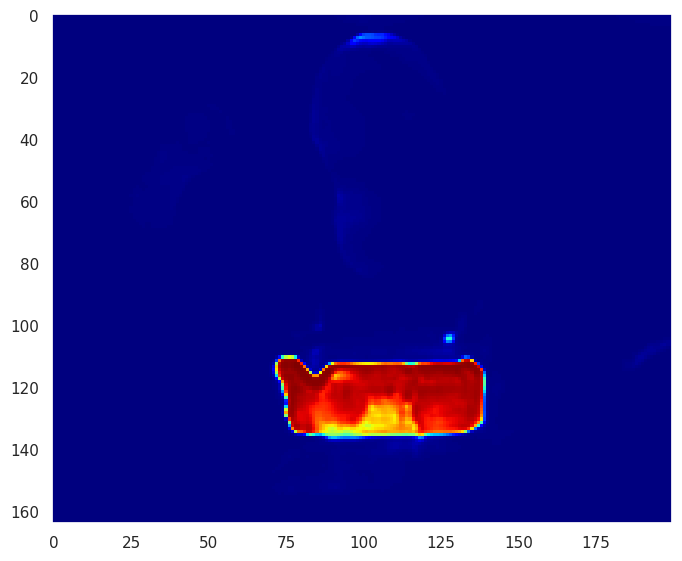

In [30]:
show_image(output_file_heatmap_path_catnet)